![alt text](Task.JPG "Задание")

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative

In [48]:
class SecondOrderEquation:
    def __init__(self) -> None:
        px =  lambda x: 0. 
        qx =  lambda x: 0. 
        rx =  lambda x: 0. 
        self.a = 0.
        self.b = 0.

        self.ct1 = 0.
        self.ct2 = 0.
        self.ct = 0.
        self.dt1 = 0.
        self.dt2 = 0.
        self.dt = 0.

class Solver:
    def __init__(self) -> None:
        self.n = 5
        self.h = 0.

    def ai(self, equation, xi):
        return 1.0 / (self.h * self.h) - equation.px(xi) / (2.0 * self.h)

    def bi(self, equation, xi):
        return 2.0 / (self.h * self.h) - equation.qx(xi)

    def ci(self, equation, xi):
            return 1.0 / (self.h * self.h) + equation.px(xi) / (2.0 * self.h)

    def di(self, equation, xi):
        return equation.rx(xi)

    def solve(self, equation):
        self.h = (equation.b - equation.a) / self.n

        e1 = -equation.ct2 / (equation.ct1 * self.h - equation.ct2)
        n1 = equation.ct * self.h / (equation.ct1 * self.h - equation.ct2)

        es = list()
        ns = list()

        es.append(e1)
        ns.append(n1)
        i = 1
        while i <= (self.n - 1):
            xi = equation.a + (i) * self.h
            lastE = es[len(es)-1]
            lastN = ns[len(ns)-1]

            e = self.ci(equation, xi) / (self.bi(equation, xi) - self.ai(equation, xi) * lastE)
            n = (lastN * self.ai(equation, xi) - self.di(equation, xi)) / (self.bi(equation, xi) - self.ai(equation, xi) * lastE)

            es.append(e)
            ns.append(n)
            i +=1
        yn = (equation.dt2 * ns[len(ns)-1] + equation.dt * self.h) / (equation.dt2 * (1 - es[len(es)-1]) + equation.dt1 * self.h)
        result = np.zeros(int(self.n)+1)
        output = list()

        result[self.n] = yn
        output.append((equation.a + (self.n) * self.h, yn))
        i = self.n
        while i >= 1:
            result[i - 1] = result[i] * es[i - 1] + ns[i - 1]
            xi = equation.a + (i - 1) * self.h

            output.append((xi, result[i - 1]))
            i -= 1
        return output

class BorderEquation(SecondOrderEquation):
    def __init__(self) -> None:
        super().__init__()
        self.px =  lambda x: 0. 
        self.qx =  lambda x: 0. 
        self.rx = lambda x: math.sin(x)
        self.a = 0.
        self.b = math.pi
        
        self.ct1 = 1
        self.dt1 = 1
        self.exact = lambda x: self.ct + (self.dt - self.ct) / math.pi * x - math.sin(x)

In [65]:
def run_task(n, a, b):
    solver = Solver()
    equation = BorderEquation()
    equation.a = a
    equation.b = b
    solver.n = n
    result = solver.solve(equation)
    x_list = list()
    y_list = list()
    y_diff_list = list()
    for i in range(len(result)):
        x_list.append(result[i][0])
        y_list.append(result[i][1])
        y_diff_list.append(math.fabs(result[i][1] - equation.exact(result[i][0])))
    plt.rcParams['figure.figsize'] = [10, 10]
    fig, ax = plt.subplots()
    plt.title("Graphic")
    ax.plot(x_list, y_list, label = "solution")
    ax.legend()
    plt.show()
    plt.rcParams['figure.figsize'] = [10, 10]
    fig, bx = plt.subplots()
    plt.title("Graphic")
    bx.plot(x_list, y_diff_list, label = "precision")
    bx.legend()
    plt.show()

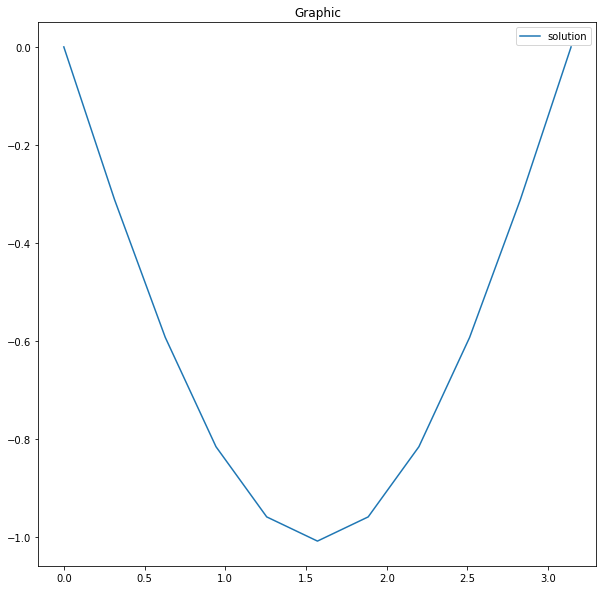

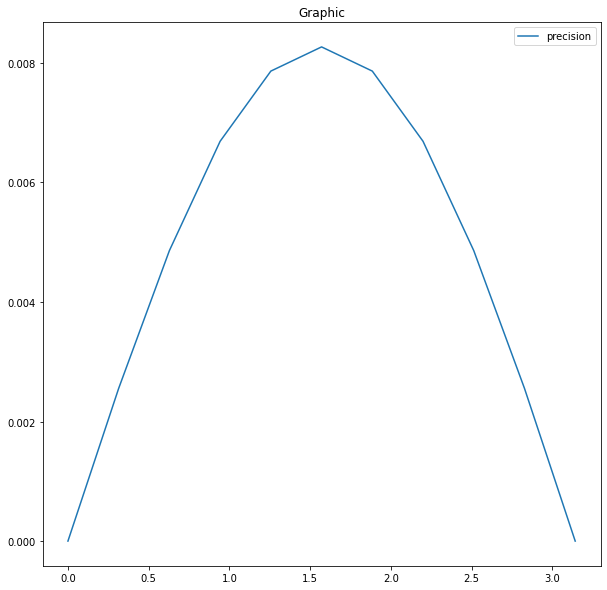

In [66]:
run_task(10, 0, math.pi)

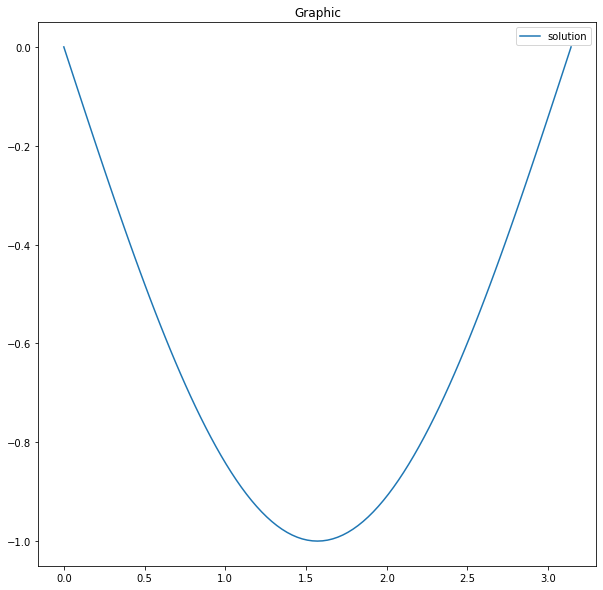

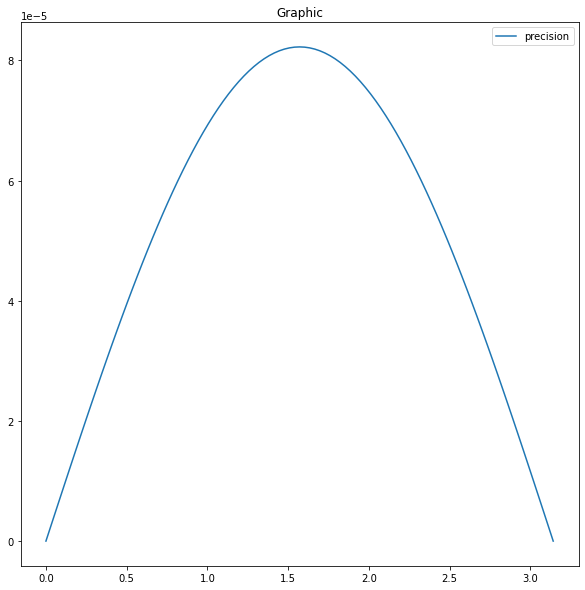

In [67]:
run_task(100, 0, math.pi)

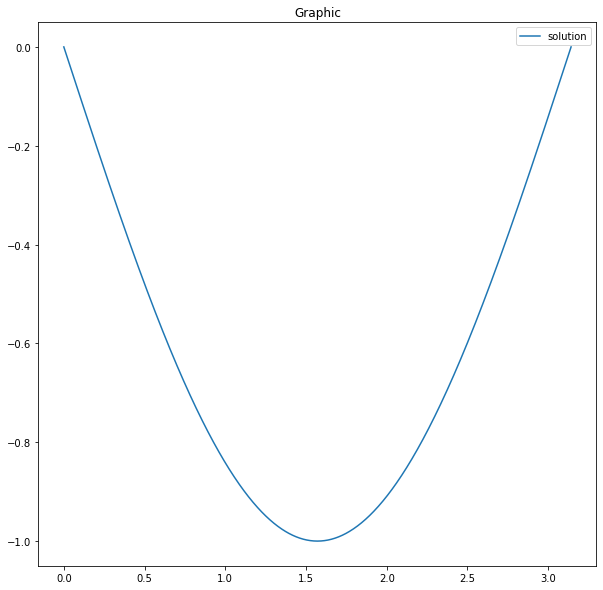

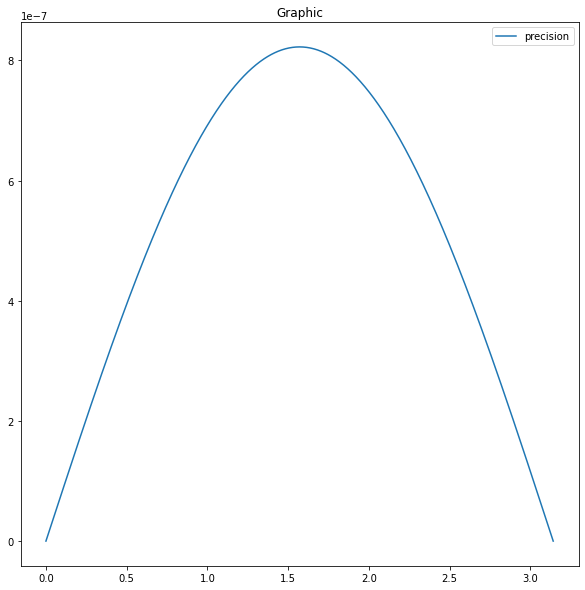

In [68]:
run_task(1000, 0, math.pi)

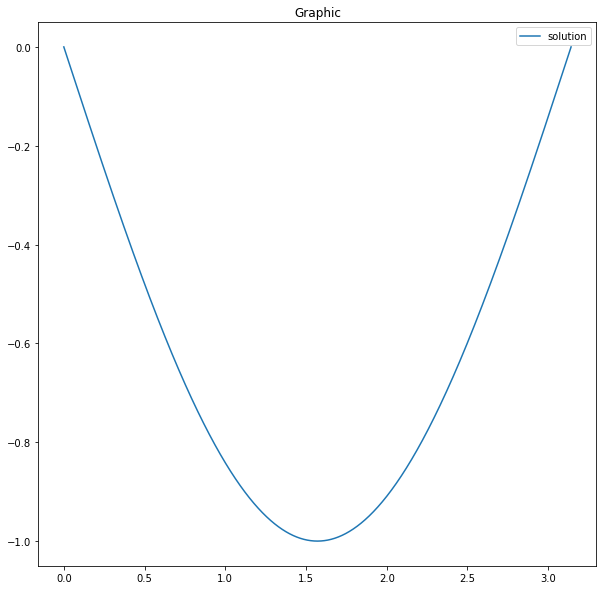

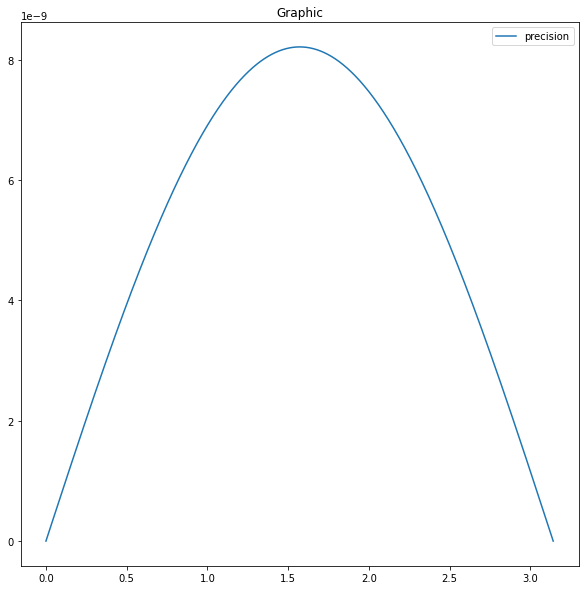

In [69]:
run_task(10000, 0, math.pi)

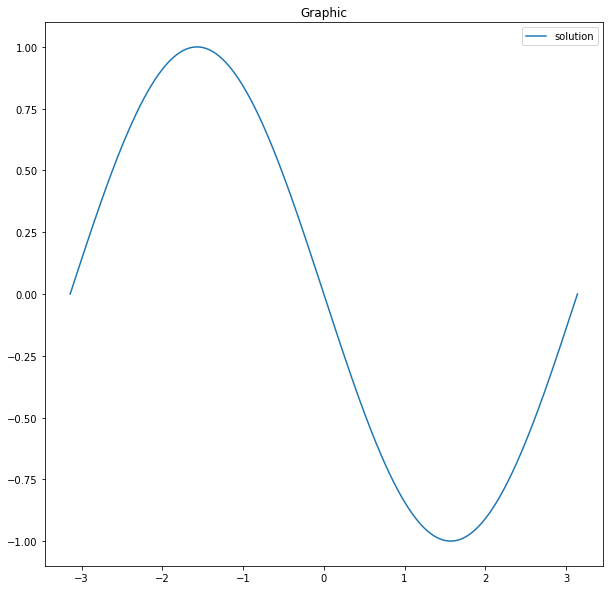

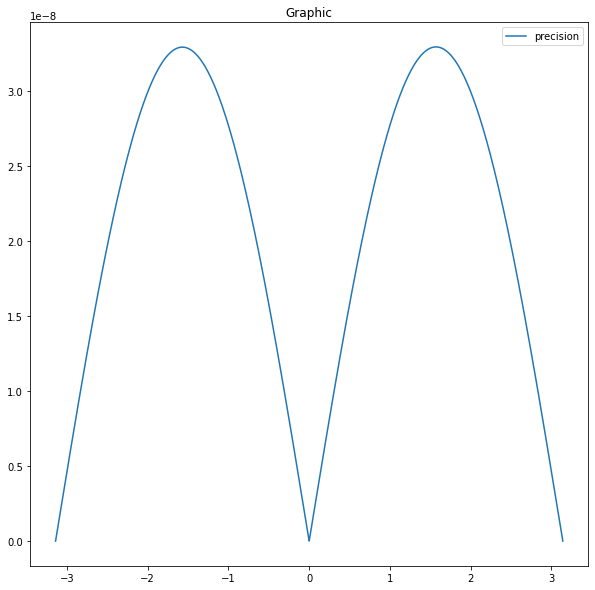

In [70]:
run_task(10000, -math.pi, math.pi)

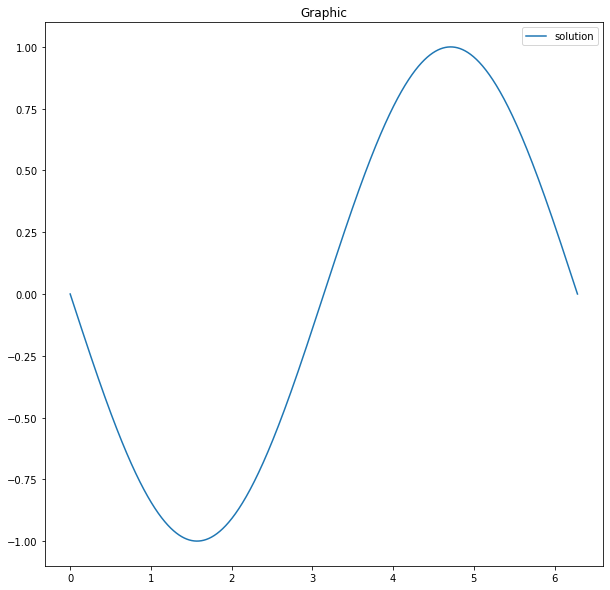

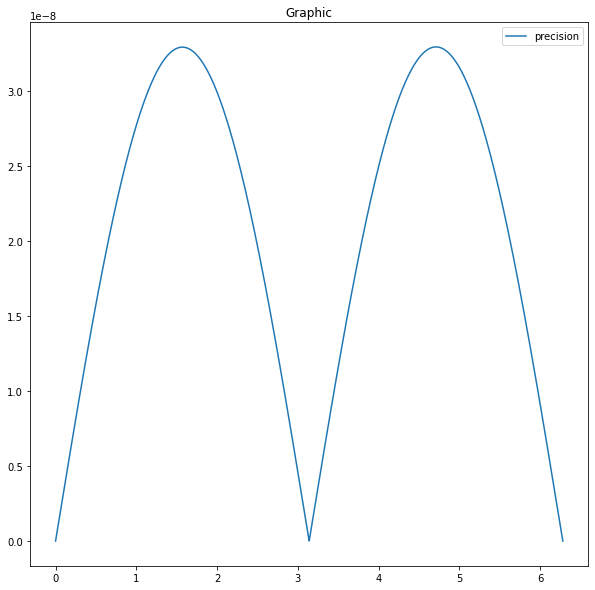

In [71]:
run_task(10000, 0, 2 * math.pi)

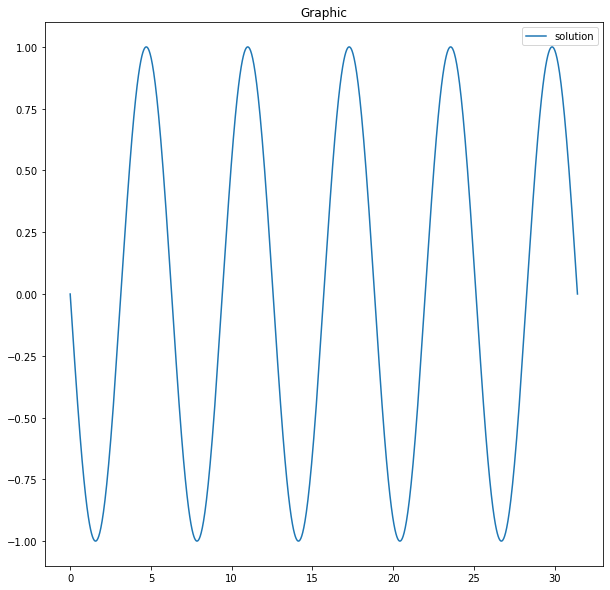

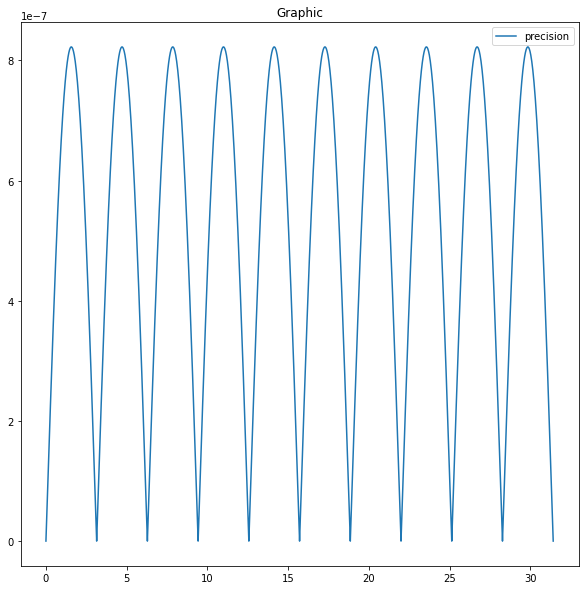

In [72]:
run_task(10000, 0, 10 * math.pi)